# 16.3 Capstone Two: Preprocessing and Training Data Development

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


In [7]:
#Loading the two csv with and without dummy variables (one-hot variable)
df = pd.read_csv('data/insurance_r1.csv') 
df_r = pd.read_csv('data/insurance_regression.csv') 

In [8]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1337 non-null   int64  
 1   sex         1337 non-null   int64  
 2   bmi         1337 non-null   float64
 3   smoker      1337 non-null   int64  
 4   charges     1337 non-null   float64
 5   children_0  1337 non-null   int64  
 6   children_1  1337 non-null   int64  
 7   children_2  1337 non-null   int64  
 8   children_3  1337 non-null   int64  
 9   children_4  1337 non-null   int64  
 10  children_5  1337 non-null   int64  
 11  SW          1337 non-null   int64  
 12  SE          1337 non-null   int64  
 13  NW          1337 non-null   int64  
 14  NE          1337 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 156.8 KB


In [20]:
df_r['SW'] = df_r['SW'].astype("category")
df_r['SE'] = df_r['SE'].astype("category")
df_r['NW'] = df_r['NW'].astype("category")
df_r['NE'] = df_r['NE'].astype("category")
df_r['children_0'] = df_r['children_0'].astype("category")
df_r['children_1'] = df_r['children_1'].astype("category")
df_r['children_2'] = df_r['children_2'].astype("category")
df_r['children_3'] = df_r['children_3'].astype("category")
df_r['children_4'] = df_r['children_4'].astype("category")
df_r['children_5'] = df_r['children_5'].astype("category")
df_r['smoker'] = df_r['smoker'].astype("category")
df_r['sex'] = df_r['sex'].astype("category")
df_r.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663628,13279.121503
std,14.044333,6.100233,12110.359677
min,18.000000,15.960000,1121.870000
25%,27.000000,26.290000,4746.340000
50%,39.000000,30.400000,9386.160000
75%,51.000000,34.700000,16657.720000
max,64.000000,53.130000,63770.430000


In [18]:
scaler = StandardScaler()
scaler.fit(df_r[['age','bmi']])
df_scaled = df_r[['age','bmi']]
df_scaled[['age','bmi']] = scaler.transform(df_r[['age','bmi']])

<ipython-input-18-bd4ba029beea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[['age','bmi']] = scaler.transform(df_r[['age','bmi']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
print(df_scaled.head())


        age       bmi
0 -1.440418 -0.453206
1 -1.511647  0.509412
2 -0.799350  0.383141
3 -0.443201 -1.305951
4 -0.514431 -0.292496


In [26]:
df_scaled_r = df_r.drop(['age','bmi','charges'],axis = 1)
df_scaled_r[['age','bmi']] = df_scaled[['age','bmi']]
df_scaled_r.head()

,sex,smoker,children_0,children_1,children_2,children_3,children_4,children_5,SW,SE,NW,NE,age,bmi
0,0,1,1,0,0,0,0,0,1,0,0,0,-1.440418,-0.453206
1,1,0,0,1,0,0,0,0,0,1,0,0,-1.511647,0.509412
2,1,0,0,0,0,1,0,0,0,1,0,0,-0.799350,0.383141
3,1,0,1,0,0,0,0,0,0,0,1,0,-0.443201,-1.305951
4,1,0,1,0,0,0,0,0,0,0,1,0,-0.514431,-0.292496


In [43]:
pca = PCA().fit(df_scaled_r)

PCA()


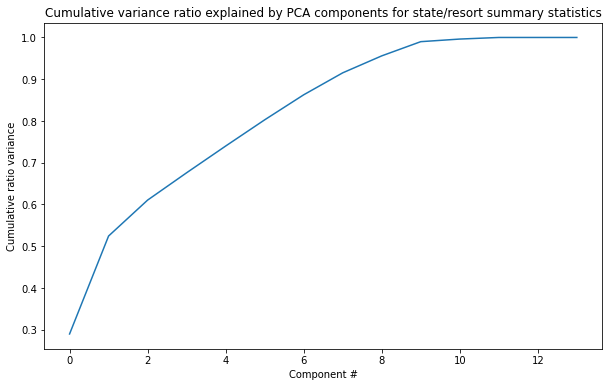

In [44]:
plt.subplots(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');
print(pca)

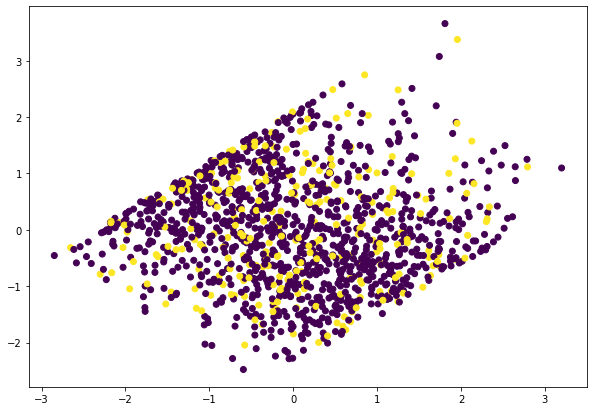

In [50]:
transformed= pca.transform(df_scaled_r)
plt.figure(figsize=(10,7))

plt.scatter(transformed[:,0],  transformed[:,1], c=df_scaled_r['smoker'])

plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled_r, 
                                                    df_r.charges, test_size=0.3, 
                                                    random_state=47)

In [52]:
print(X_train)

     sex smoker children_0 children_1 children_2 children_3 children_4  \
642    0      0          0          0          0          1          0   
966    1      0          0          1          0          0          0   
836    0      0          1          0          0          0          0   
298    1      1          0          0          0          1          0   
617    0      1          1          0          0          0          0   
...   ..    ...        ...        ...        ...        ...        ...   
691    1      0          0          1          0          0          0   
584    0      0          0          1          0          0          0   
1288   1      0          0          1          0          0          0   
327    1      1          0          0          1          0          0   
1159   0      0          0          1          0          0          0   

     children_5 SW SE NW NE       age       bmi  
642           0  0  0  1  0 -1.155499  0.704560  
966        

In [53]:
print(X_test)

     sex smoker children_0 children_1 children_2 children_3 children_4  \
236    0      0          1          0          0          0          0   
664    1      1          0          0          1          0          0   
273    1      0          0          1          0          0          0   
680    1      0          1          0          0          0          0   
494    1      1          0          0          0          0          1   
...   ..    ...        ...        ...        ...        ...        ...   
16     0      0          0          1          0          0          0   
150    1      0          0          1          0          0          0   
391    0      0          1          0          0          0          0   
1200   1      0          0          0          1          0          0   
293    0      0          1          0          0          0          0   

     children_5 SW SE NW NE       age       bmi  
236           0  0  1  0  0 -1.511647 -0.645074  
664        

In [54]:
print(y_train)

642      4466.62
966      7518.03
836     11657.72
298     38746.36
617     34439.86
          ...   
691      2362.23
584      4779.60
1288     7147.47
327     42760.50
1159     7727.25
Name: charges, Length: 935, dtype: float64


In [55]:
y_test

236      1615.77
664     42560.43
273      9617.66
680      1242.26
494     17942.11
          ...   
16      10797.34
150      5125.22
391      2138.07
1200     8733.23
293      2156.75
Name: charges, Length: 402, dtype: float64

In [60]:
X = df_scaled_r
df['charges_gp'] = pd.cut(df['charges'],bins=[-np.inf, 5000, 10000, 15000,20000,25000,30000,35000,40000,45000,
                                              50000,55000,60000,np.inf],labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13])
y= df['charges_gp']


In [61]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(random_state = 10)
rfecv = RFECV(estimator = rfc,step = 1, cv = StratifiedKFold(10),scoring ='accuracy')
rfecv.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=10), scoring='accuracy')

In [62]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 9


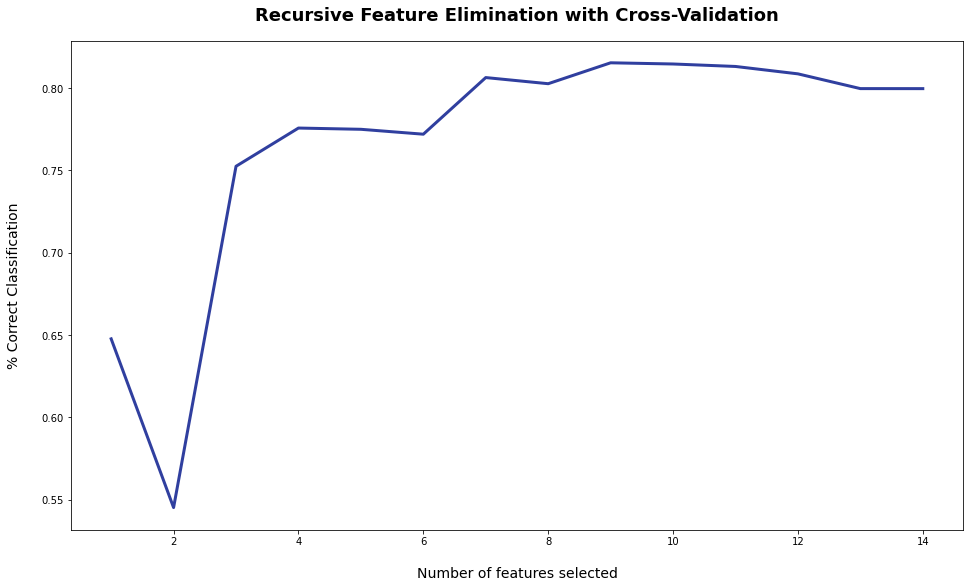

In [63]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [64]:

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[4 5 6 7 8]


In [65]:
rfecv.estimator_.feature_importances_


array([0.02459804, 0.13945816, 0.03125926, 0.02110491, 0.01738783,
       0.0174848 , 0.01745735, 0.51784996, 0.2133997 ])

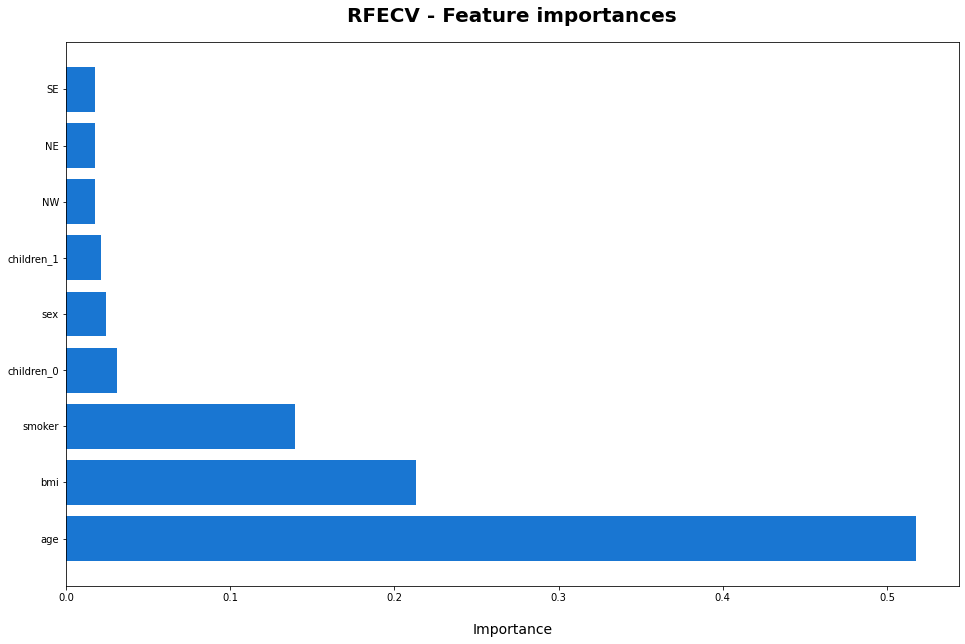

In [66]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [70]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X = df_scaled_r
y= df['charges_gp']
bestfeatures = SelectKBest(score_func = chi2, k ='all')
fit = bestfeatures.fit(X,y)


ValueError: Input X must be non-negative.

In [71]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [69]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
featureScores.Score

0     4240.976372
1       10.809406
2      172.322010
3      765.738956
4       60.975720
5       26.774848
6       22.105797
7       26.156434
8       11.628431
9       10.217532
10      14.930369
11      24.019221
12       8.601303
13       7.504769
Name: Score, dtype: float64